In [1]:
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt

import sys

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import sklearn as sk
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

In [2]:
#cijene = pd.read_parquet("C:/Users/vvrhovec/Veronika/mdevelop/data/parquet/cene.parquet", columns=['art','datum','redna_cena','akcijska_cena'])
#dostupnost = pd.read_parquet("C:/Users/vvrhovec/Veronika/mdevelop/data/parquet/availability.parquet")
#kolicina = pd.read_parquet("C:/Users/vvrhovec/Veronika/mdevelop/data/parquet/training/training.prodaja.parquet", columns=['art','datum','kol'])
#podaci_0 = pd.merge(cijene, dostupnost, on=['art','datum'], how='inner')
#podaci_1 = pd.merge(podaci_0, kolicina, on=['art','datum'], how='inner')
#podaci_1.describe()

#brojac = 0

#for art, new_df in podaci_1.groupby(level=0):
 #   if brojac == 5:
  #      break
   # if len(new_df.index) > 800:
    #    brojac = brojac + 1
     #   print("artikl:", art, "duljina:", len(new_df.index))   
        
#podaci_2 = podaci_1.loc[[38,39,40,41,57]]
#podaci_2.head(100)
#finalna_tablica = podaci_2

#podaci_2.sort_index(inplace=True)
#dataParquet_s = podaci_2.to_parquet('dataParquet_s.parquet')

#dataParquet_s = podaci.to_parquet('dataParquet.parquet')

* provodimo isti algoritam kao u prvom kodu, ali ga provodimo na svakom artiklu zasebno.

In [2]:
podaci_38 = pd.read_parquet("C:/Users/vvrhovec/Veronika/kodovi/podaci_art38.parquet")
podaci_39 = pd.read_parquet("C:/Users/vvrhovec/Veronika/kodovi/podaci_art39.parquet")
podaci_40 = pd.read_parquet("C:/Users/vvrhovec/Veronika/kodovi/podaci_art40.parquet")
podaci_41 = pd.read_parquet("C:/Users/vvrhovec/Veronika/kodovi/podaci_art41.parquet")
podaci_57 = pd.read_parquet("C:/Users/vvrhovec/Veronika/kodovi/podaci_art57.parquet")

C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [5]:
#print(podaci_38)

In [6]:
std_scaler = StandardScaler()

## **artikl 38**

### Odvajanje podataka u testni i trening set

In [7]:
X_train_38 = podaci_38.loc[podaci_38.index.get_level_values('datum') <= '2018-01-01']
X_test_38 = podaci_38.loc[podaci_38.index.get_level_values('datum') > '2018-01-01']
y_train_38 = X_train_38['kol']
y_test_38 = X_test_38['kol']

In [8]:
print (X_train_38.shape, y_train_38.shape)
print (X_test_38.shape, y_test_38.shape)

(685, 12) (685,)
(130, 12) (130,)


### Preprocesiranje **TRAINING** podataka

In [9]:
std_scaler.fit(X_train_38)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
X_train_38_scaled = std_scaler.transform(X_train_38)

### Fittamo model na podacima trening seta

In [11]:
lm = linear_model.LinearRegression()
model_38 = lm.fit(X_train_38_scaled, y_train_38)

In [12]:
predictions_38 = model_38.predict(X_train_38_scaled)

In [13]:
print(X_train_38_scaled)

[[ 0.16833315  0.16833315  0.69406834 ...  2.36358593 -0.40859588
   1.54631469]
 [ 0.16833315  0.16833315  0.52084628 ... -0.42308595  2.44740596
   1.54631469]
 [ 0.16833315  0.16833315  0.80954972 ... -0.42308595 -0.40859588
  -0.6466989 ]
 ...
 [ 0.16833315  0.16833315 -1.3268557  ... -0.42308595 -0.40859588
  -0.6466989 ]
 [ 0.16833315  0.16833315 -1.67329982 ...  2.36358593 -0.40859588
   1.54631469]
 [ 0.16833315  0.16833315 -1.55781845 ... -0.42308595  2.44740596
   1.54631469]]


In [14]:
model_38.score(X_train_38_scaled, y_train_38)

1.0

In [15]:
mae_train_38 = mean_absolute_error(y_train_38, predictions_38)  # mjera greške
mae_train_38

7.167664677521595e-14

In [16]:
mse_train_38 = mean_squared_error(y_train_38, predictions_38)  # mjera greške
mse_train_38

9.799951079876823e-27

### TEST 

In [17]:
X_test_38_scaled = std_scaler.transform(X_test_38)
y_pred_38 = model_38.predict(X_test_38_scaled)

In [153]:
mae_test_38 = mean_absolute_error(y_test_38, y_pred_38)
mae_test_38

806.6825259826941

In [154]:
mse_test_38 = mean_squared_error(y_train_38, predictions_38)
mse_test_38

9.799951079876823e-27

In [155]:
koeficijenti_38 = model_38.coef_
print("nagib je: ",koeficijenti_38)

odsjecak_38 = model_38.intercept_
print("odsječak je: ",odsjecak_38)

paramtetri_38 = model_38.get_params
print(paramtetri_38)

nagib je:  [ 2.86473752e-01 -2.86473752e-01 -2.09832152e-14  1.55609936e+02
  2.98660362e+00  2.92178211e+00  2.93496662e+00  3.01178129e+00
  2.98660362e+00  1.05140659e+01  1.02588350e+01 -9.47076047e+00]
odsječak je:  253.83211678832117
<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>


In [156]:
predictions_38[0:5] # prvih pet predviđenih vrijednosti

array([769., 100., 305.,  79., 344.])

In [157]:
koeficijenti_38.size 

12

12 feature-a: <br> 
f((x1,...,x12)) = a1x1 +...+ a12x12 + b0

Text(0, 0.5, 'predviđene količine')

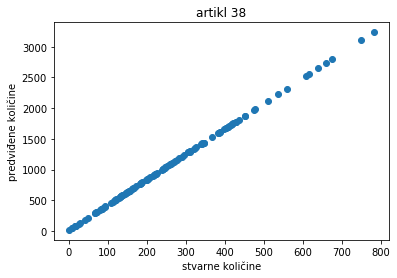

In [158]:
plt.scatter(y_test_38, y_pred_38)
plt.title("artikl 38")
plt.xlabel("stvarne količine")
plt.ylabel("predviđene količine")

In [159]:
print(X_test_38['kol'].head(10))

art  datum     
38   2018-01-02    307.0
     2018-01-03    118.0
     2018-01-04    223.0
     2018-01-06    429.0
     2018-01-07     80.0
     2018-01-08    134.0
     2018-01-09     67.0
     2018-01-10    260.0
     2018-01-11    311.0
     2018-01-12    273.0
Name: kol, dtype: float64


In [160]:
print(y_pred_38[:10])

[1277.4775218   498.45098054  931.27168738 1780.79344032  341.82027054
  564.53529349  288.42766087 1083.63881492 1293.92330306 1137.25265141]


In [161]:
print(y_test_38[:10])

art  datum     
38   2018-01-02    307.0
     2018-01-03    118.0
     2018-01-04    223.0
     2018-01-06    429.0
     2018-01-07     80.0
     2018-01-08    134.0
     2018-01-09     67.0
     2018-01-10    260.0
     2018-01-11    311.0
     2018-01-12    273.0
Name: kol, dtype: float64


In [162]:
r2_score(y_pred_38,y_test_38)

-0.9999984732427507

## **artikl 39**

### Odvajanje podataka u testni i trening set

In [45]:
X_train_39 = podaci_39.loc[podaci_39.index.get_level_values('datum') <= '2018-01-01']
X_test_39 = podaci_39.loc[podaci_39.index.get_level_values('datum') > '2018-01-01']
y_train_39 = X_train_39['kol']
y_test_39 = X_test_39['kol']

In [46]:
print (X_train_39.shape, y_train_39.shape)
print (X_test_39.shape, y_test_39.shape)

(724, 12) (724,)
(145, 12) (145,)


### Preprocesiranje **TRAINING** podataka

In [47]:
std_scaler.fit(X_train_39)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [48]:
X_train_39_scaled = std_scaler.transform(X_train_39)

### Fittamo model na podacima trening seta

In [49]:
lm = linear_model.LinearRegression()
model_39 = lm.fit(X_train_39_scaled, y_train_39)

In [50]:
predictions_39 = model_39.predict(X_train_39_scaled)

In [51]:
print(X_train_39_scaled)

[[ 0.0371904   0.0371904   1.04877196 ...  2.42801114 -0.40263976
   1.5857374 ]
 [ 0.0371904   0.0371904  -0.38080746 ... -0.41185972  2.48360964
   1.5857374 ]
 [ 0.0371904   0.0371904   0.43609507 ... -0.41185972 -0.40263976
  -0.63062144]
 ...
 [ 0.0371904   0.0371904   0.43609507 ... -0.41185972 -0.40263976
  -0.63062144]
 [ 0.0371904   0.0371904   0.0276438  ...  2.42801114 -0.40263976
   1.5857374 ]
 [ 0.0371904   0.0371904  -1.81038689 ... -0.41185972  2.48360964
   1.5857374 ]]


In [52]:
model_39.score(X_train_39_scaled, y_train_39)

1.0

In [53]:
mae_39 = mean_absolute_error(y_train_39, predictions_39)  # mjera greške
mae_39

1.4276805643162056e-12

In [54]:
mse_39 = mean_squared_error(y_train_39, predictions_39)  # mjera greške
mse_39

3.445967023531078e-24

### TEST 

In [55]:
X_test_39_scaled = std_scaler.transform(X_test_39)
y_pred_39 = model_39.predict(X_test_39_scaled)

In [56]:
mae_39 = mean_absolute_error(y_test_39, y_pred_39)
mae_39

1.4081486934346373e-12

In [57]:
mse_39 = mean_squared_error(y_train_39, predictions_39)
mse_39

3.445967023531078e-24

In [58]:
koeficijenti_39 = model_39.coef_
print(koeficijenti_39)

odsjecak_39 = model_39.intercept_
print(odsjecak_39)

paramtetri_39 = model_39.get_params
print(paramtetri_39)

[-1.34104274e+02  1.34104274e+02 -4.08562073e-14  1.85174137e+03
 -3.69970125e+02 -3.71462313e+02 -3.69970125e+02 -3.71462313e+02
 -3.71462313e+02  4.59226248e+02  4.51847037e+02 -1.06627707e+03]
3457.011049723757
<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>


In [59]:
predictions_39[0:5] # prvih pet predviđenih vrijednosti

array([2149., 1155., 1190.,  902., 3220.])

Text(0, 0.5, 'predviđene količine')

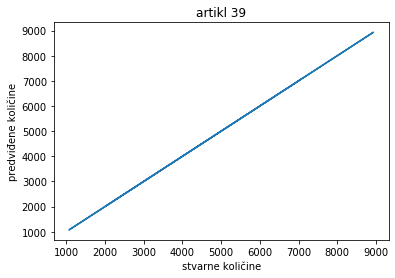

In [60]:
plt.plot(y_test_39, y_pred_39)
plt.title("artikl 39")
plt.xlabel("stvarne količine")
plt.ylabel("predviđene količine")

In [61]:
#print(X_test_39['kol'].head(10))

In [62]:
print(y_pred_39[:10])

[2033. 2777. 3817. 2417. 3414. 1653. 1729. 1254. 5149. 4036.]


In [63]:
print(y_test_39[:10])

art  datum     
39   2018-01-02    2033.0
     2018-01-03    2777.0
     2018-01-04    3817.0
     2018-01-05    2417.0
     2018-01-06    3414.0
     2018-01-07    1653.0
     2018-01-08    1729.0
     2018-01-09    1254.0
     2018-01-10    5149.0
     2018-01-11    4036.0
Name: kol, dtype: float64


## **artikl 40**

### Odvajanje podataka u testni i trening set

In [65]:
X_train_40 = podaci_40.loc[podaci_40.index.get_level_values('datum') <= '2018-01-01']
X_test_40 = podaci_40.loc[podaci_40.index.get_level_values('datum') > '2018-01-01']
y_train_40 = X_train_40['kol']
y_test_40 = X_test_40['kol']

In [66]:
print (X_train_40.shape, y_train_40.shape)
print (X_test_40.shape, y_test_40.shape)

(724, 12) (724,)
(145, 12) (145,)


### Preprocesiranje **TRAINING** podataka

In [67]:
std_scaler.fit(X_train_40)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [68]:
X_train_40_scaled = std_scaler.transform(X_train_40)

### Fittamo model na podacima trening seta

In [69]:
lm = linear_model.LinearRegression()
model_40 = lm.fit(X_train_40_scaled, y_train_40)

In [70]:
predictions_40 = model_40.predict(X_train_40_scaled)

In [71]:
print(X_train_40_scaled)

[[ 0.1740977   0.59146837  2.02475236 ...  2.42801114 -0.40263976
   1.5857374 ]
 [ 0.1740977   0.75135982  2.02475236 ... -0.41185972  2.48360964
   1.5857374 ]
 [ 0.1740977   0.61671458  2.00821519 ... -0.41185972 -0.40263976
  -0.63062144]
 ...
 [ 0.1740977   0.75135982 -0.50543432 ... -0.41185972 -0.40263976
  -0.63062144]
 [ 0.19894885  0.75977505 -0.52197149 ...  2.42801114 -0.40263976
   1.5857374 ]
 [ 0.1740977   0.75135982 -0.53850866 ... -0.41185972  2.48360964
   1.5857374 ]]


In [72]:
model_40.score(X_train_40_scaled, y_train_40)

1.0

In [73]:
mae_40 = mean_absolute_error(y_train_40, predictions_40)  # mjera greške
mae_40

6.759970115905484e-14

In [74]:
mse_40 = mean_squared_error(y_train_40, predictions_40)  # mjera greške
mse_40

7.189809040610581e-27

### TEST 

In [75]:
X_test_40_scaled = std_scaler.transform(X_test_40)
y_pred_40 = model_40.predict(X_test_40_scaled)

In [76]:
mae_40 = mean_absolute_error(y_test_40, y_pred_40)
mae_40

6.536993168992921e-14

In [77]:
mse_40 = mean_squared_error(y_train_40, predictions_40)
mse_40

7.189809040610581e-27

In [78]:
koeficijenti_40 = model_40.coef_
print(koeficijenti_40)

odsjecak_40 = model_40.intercept_
print(odsjecak_40)

paramtetri_40 = model_40.get_params
print(paramtetri_40)

[-2.50733807e-14  5.68434189e-14  3.24185123e-14  1.21439049e+02
  1.23988825e+00  1.24488905e+00  1.23988825e+00  1.24488905e+00
  1.24488905e+00 -4.28277087e-01 -4.21395193e-01  2.15022309e+00]
165.02624309392266
<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>


In [79]:
predictions_40[0:5] # prvih pet predviđenih vrijednosti

array([ 83.,  37., 137., 167., 187.])

Text(0, 0.5, 'predviđene količine')

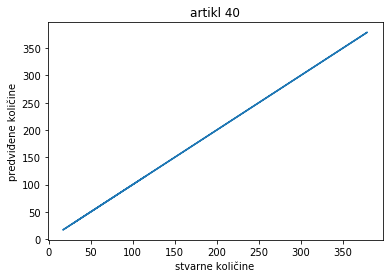

In [80]:
plt.plot(y_test_40, y_pred_40)
plt.title("artikl 40")
plt.xlabel("stvarne količine")
plt.ylabel("predviđene količine")

In [81]:
#print(X_test_40['kol'].head(10))

In [82]:
print(y_pred_40[:10])

[ 30.  76. 103. 138. 120.  41.  87.  54.  86.  85.]


In [83]:
print(y_test_40[:10])

art  datum     
40   2018-01-02     30.0
     2018-01-03     76.0
     2018-01-04    103.0
     2018-01-05    138.0
     2018-01-06    120.0
     2018-01-07     41.0
     2018-01-08     87.0
     2018-01-09     54.0
     2018-01-10     86.0
     2018-01-11     85.0
Name: kol, dtype: float64


## **artikl 41**

### Odvajanje podataka u testni i trening set

In [84]:
X_train_41 = podaci_41.loc[podaci_41.index.get_level_values('datum') <= '2018-01-01']
X_test_41 = podaci_41.loc[podaci_41.index.get_level_values('datum') > '2018-01-01']
y_train_41 = X_train_41['kol']
y_test_41 = X_test_41['kol']

In [85]:
print (X_train_41.shape, y_train_41.shape)
print (X_test_41.shape, y_test_41.shape)

(722, 12) (722,)
(145, 12) (145,)


### Preprocesiranje **TRAINING** podataka

In [86]:
std_scaler.fit(X_train_41)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [87]:
X_train_41_scaled = std_scaler.transform(X_train_41)

### Fittamo model na podacima trening seta

In [88]:
lm = linear_model.LinearRegression()
model_41 = lm.fit(X_train_41_scaled, y_train_41)

In [89]:
predictions_41 = model_41.predict(X_train_41_scaled)

In [90]:
print(X_train_41_scaled)

[[ 1.29931607  0.21128125  1.53900661 ...  2.42408549 -0.40096347
   1.58806524]
 [-2.09977801  0.1829984   1.53900661 ... -0.4125267   2.49399278
   1.58806524]
 [-0.40012967  0.19714067  1.4712755  ... -0.4125267  -0.40096347
  -0.62969705]
 ...
 [ 1.29931607  0.21128125 -1.13637235 ... -0.4125267  -0.40096347
  -0.62969705]
 [-0.40012967  0.19714067 -1.13637235 ...  2.42408549 -0.40096347
   1.58806524]
 [-0.40012967  0.19714067 -1.13637235 ... -0.4125267   2.49399278
   1.58806524]]


In [91]:
model_41.score(X_train_41_scaled, y_train_41)

1.0

In [92]:
mae_41 = mean_absolute_error(y_train_41, predictions_41)  # mjera greške
mae_41

1.943905178407393e-14

In [93]:
mse_41 = mean_squared_error(y_train_41, predictions_41)  # mjera greške
mse_41

6.080434967350898e-28

### TEST 

In [94]:
X_test_41_scaled = std_scaler.transform(X_test_41)
y_pred_41 = model_41.predict(X_test_41_scaled)

In [95]:
mae_41 = mean_absolute_error(y_test_41, y_pred_41)
mae_41

1.5864704186367755e-14

In [96]:
mse_41 = mean_squared_error(y_train_41, predictions_41)
mse_41

6.080434967350898e-28

In [97]:
koeficijenti_41 = model_41.coef_
print(koeficijenti_39)

odsjecak_41 = model_41.intercept_
print(odsjecak_39)

paramtetri_41 = model_41.get_params
print(paramtetri_39)

[-1.34104274e+02  1.34104274e+02 -4.08562073e-14  1.85174137e+03
 -3.69970125e+02 -3.71462313e+02 -3.69970125e+02 -3.71462313e+02
 -3.71462313e+02  4.59226248e+02  4.51847037e+02 -1.06627707e+03]
3457.011049723757
<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>


In [98]:
predictions_41[0:5] # prvih pet predviđenih vrijednosti

array([18., 19., 25., 21., 20.])

Text(0, 0.5, 'predviđene količine')

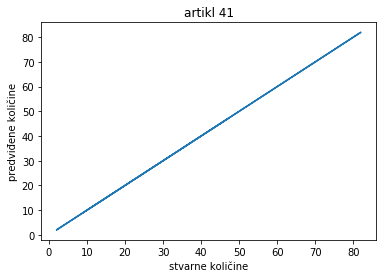

In [99]:
plt.plot(y_test_41, y_pred_41)
plt.title("artikl 41")
plt.xlabel("stvarne količine")
plt.ylabel("predviđene količine")

In [100]:
#print(X_test_41['kol'].head(10))

In [101]:
print(y_pred_41[:10])

[ 9. 30. 31. 22. 26.  6. 21. 15. 15. 37.]


In [102]:
print(y_test_41[:10])

art  datum     
41   2018-01-02     9.0
     2018-01-03    30.0
     2018-01-04    31.0
     2018-01-05    22.0
     2018-01-06    26.0
     2018-01-07     6.0
     2018-01-08    21.0
     2018-01-09    15.0
     2018-01-10    15.0
     2018-01-11    37.0
Name: kol, dtype: float64


## **artikl 57**

### Odvajanje podataka u testni i trening set

In [103]:
X_train_57 = podaci_57.loc[podaci_57.index.get_level_values('datum') <= '2018-01-01']
X_test_57 = podaci_57.loc[podaci_57.index.get_level_values('datum') > '2018-01-01']
y_train_57 = X_train_57['kol']
y_test_57 = X_test_57['kol']

In [104]:
print (X_train_57.shape, y_train_57.shape)
print (X_test_57.shape, y_test_57.shape)

(680, 12) (680,)
(121, 12) (121,)


### Preprocesiranje **TRAINING** podataka

In [105]:
std_scaler.fit(X_train_57)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [106]:
X_train_57_scaled = std_scaler.transform(X_train_57)

### Fittamo model na podacima trening seta

In [107]:
lm = linear_model.LinearRegression()
model_57 = lm.fit(X_train_57_scaled, y_train_57)

In [108]:
predictions_57 = model_57.predict(X_train_57_scaled)

In [109]:
print(X_train_57_scaled)

[[ 0.11391021  0.11391021  1.60023899 ...  2.45159321 -0.40789801
   1.58276803]
 [ 0.57224625  0.57224625  1.35742687 ... -0.40789801  2.45159321
   1.58276803]
 [-0.34442584 -0.34442584  1.47883293 ... -0.40789801 -0.40789801
  -0.63180452]
 ...
 [ 6.07226513  6.07226513 -1.19210038 ... -0.40789801 -0.40789801
  -0.63180452]
 [-0.34442584 -0.34442584 -1.19210038 ...  2.45159321 -0.40789801
   1.58276803]
 [-0.34442584 -0.34442584 -1.19210038 ... -0.40789801  2.45159321
   1.58276803]]


In [110]:
model_57.score(X_train_57_scaled, y_train_57)

1.0

In [111]:
mae_57 = mean_absolute_error(y_train_57, predictions_57)  # mjera greške
mae_57

1.9900421180222218e-14

In [112]:
mse_57 = mean_squared_error(y_train_57, predictions_57)  # mjera greške
mse_57

8.659094138697747e-28

### TEST 

In [113]:
X_test_57_scaled = std_scaler.transform(X_test_57)
y_pred_57 = model_57.predict(X_test_57_scaled)

In [114]:
mae_57 = mean_absolute_error(y_test_57, y_pred_57)
mae_57

3.36480155033502e-14

In [115]:
mse_57 = mean_squared_error(y_train_57, predictions_57)
mse_57

8.659094138697747e-28

In [116]:
koeficijenti_57 = model_57.coef_
print(koeficijenti_57)

odsjecak_57 = model_57.intercept_
print(odsjecak_57)

paramtetri_57 = model_57.get_params
print(paramtetri_57)

[ 6.27282272e-03 -6.27282272e-03 -1.95676808e-14  3.77598603e+01
 -2.35045717e+00 -2.29887192e+00 -2.35045717e+00 -2.38037947e+00
 -2.38037947e+00  3.91227618e+00  3.91227618e+00 -8.08654070e+00]
58.60294117647059
<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>


In [117]:
predictions_57[0:5] # prvih pet predviđenih vrijednosti

array([73.,  4., 34., 27., 61.])

Text(0, 0.5, 'predviđene količine')

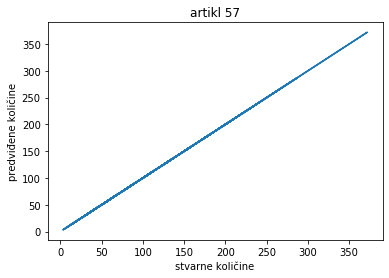

In [118]:
plt.plot(y_test_57, y_pred_57)
plt.title("artikl 57")
plt.xlabel("stvarne količine")
plt.ylabel("predviđene količine")

In [119]:
#print(X_test_57['kol'].head(10))

In [120]:
print(y_pred_57[:10])

[ 26.  24.  28. 212.  72.  12.  19.  49.  95. 142.]


In [121]:
print(y_test_57[:10])

art  datum     
57   2018-01-02     26.0
     2018-01-03     24.0
     2018-01-04     28.0
     2018-01-05    212.0
     2018-01-06     72.0
     2018-01-07     12.0
     2018-01-08     19.0
     2018-01-10     49.0
     2018-01-11     95.0
     2018-01-12    142.0
Name: kol, dtype: float64
